In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
#importing the libraries
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import gradient_descent_v2,SGD,Adagrad,RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
classifier= Sequential() # Initialise the CNN
# Ist step of Convoltional layer to get feature maps using feature detector

classifier.add(Convolution2D(filters=32, # output feature maps
                             kernel_size=(7,7), # matrix size for feature detector
                             strides=1,
                             padding='valid',
                             input_shape=(64,64,3), # input image shape, 3 is for rgb coloured image with 128*128 px
                             kernel_initializer='he_uniform', # weights distriution
                             activation='relu')) # activation function


#2nd conv layer#
classifier.add(Convolution2D(filters=16, # output feature maps
                             kernel_size=(7,7), # matrix size for feature detector
                             strides=1,
                             padding='valid',
                             input_shape=(64,64,3), # input image shape, 3 is for rgb coloured image with 128*128 px
                             kernel_initializer='he_uniform', # weights distriution
                             activation='relu')) # activation function
# 3rd Pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

#4rh conv layer
classifier.add(Convolution2D(filters=16, # output feature maps
                             kernel_size=(5,6), # matrix size for feature detector
                             strides=1,
                             padding='same',
                             input_shape=(64,64,3), # input image shape, 3 is for rgb coloured image with 128*128 px
                             kernel_initializer='he_uniform', # weights distriution
                             activation='relu')) # activation function

classifier.add(Dropout(.50))
classifier.add(Convolution2D(filters=16, # output feature maps
                             kernel_size=(5,5), # matrix size for feature detector
                             strides=1,
                             padding='valid',
                             input_shape=(64,64,3), # input image shape, 3 is for rgb coloured image with 128*128 px
                             kernel_initializer='he_uniform', # weights distriution
                             activation='relu')) # activation function
#flatten
classifier.add(Flatten())


In [7]:
#Step 4 full connection in which input we have from flattening

classifier.add(Dense(units=1024, activation='relu')) 
#step 5 output layer
classifier.add(Dense(units=50,activation='softmax'))


In [14]:
# Compiling the CNN
classifier.compile(optimizer =SGD(learning_rate=0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])
'''optimizer
SGD gradient_descent_v2,SGD,Adagrad,RMSprop'''

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
#applying all the transformation we want to apply to training data set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode='nearest')

In [17]:
#Rescling the test data set images to use for validation.
test_datagen= ImageDataGenerator(rescale=1./255)

In [18]:
#Getting My training data ready for validation, so it will read all the data with the px size we gave.
training_set= train_datagen.flow_from_directory(directory= '/content/gdrive/MyDrive/Colab Notebooks/FaceDataset/train',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=32,
                                               class_mode='categorical' # for 50 class 
                                               )

Found 4298 images belonging to 50 classes.


In [19]:
#Getting My test data ready for validation, so it will read all the data with the px size we gave.

test_set= test_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/Colab Notebooks/FaceDataset/test',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=32,
                                               class_mode='categorical' # for 50 class 
                                          )

Found 100 images belonging to 50 classes.


In [20]:
classifier.fit(training_set,epochs=10,
               verbose=1,
               validation_data=test_set
               )

Epoch 1/10
135/135 [==============================] - 1552s 11s/step - loss: 3.9276 - accuracy: 0.0293 - val_loss: 3.9341 - val_accuracy: 0.0200
Epoch 2/10
135/135 [==============================] - 131s 966ms/step - loss: 3.8729 - accuracy: 0.0372 - val_loss: 3.9157 - val_accuracy: 0.0200
Epoch 3/10
135/135 [==============================] - 131s 966ms/step - loss: 3.8575 - accuracy: 0.0382 - val_loss: 3.9139 - val_accuracy: 0.0000e+00
Epoch 4/10
135/135 [==============================] - 131s 969ms/step - loss: 3.8392 - accuracy: 0.0428 - val_loss: 3.8883 - val_accuracy: 0.0100
Epoch 5/10
135/135 [==============================] - 130s 966ms/step - loss: 3.8011 - accuracy: 0.0500 - val_loss: 3.8855 - val_accuracy: 0.0300
Epoch 6/10
135/135 [==============================] - 131s 972ms/step - loss: 3.7698 - accuracy: 0.0631 - val_loss: 3.8404 - val_accuracy: 0.0300
Epoch 7/10
135/135 [==============================] - 131s 971ms/step - loss: 3.7371 - accuracy: 0.0665 - val_loss: 3.670

In [21]:
def plotimage(imgarr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(imgarr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

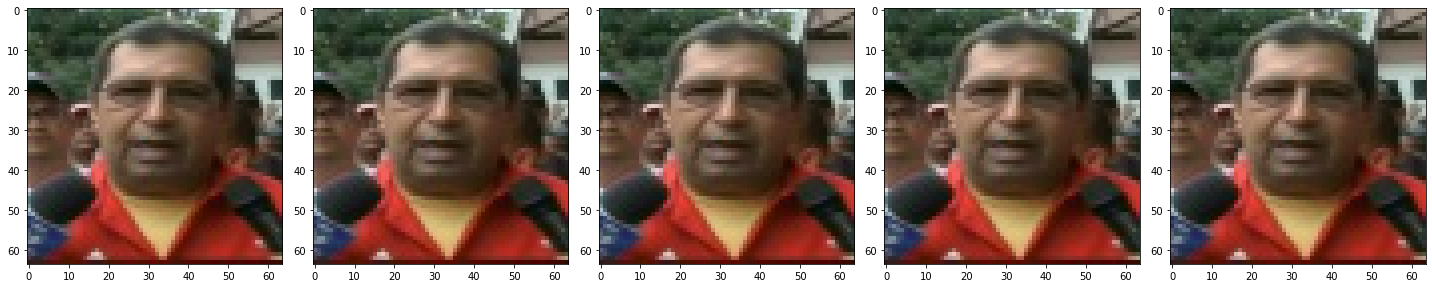

In [24]:
img=[test_set[1][0][0] for i in range(5)]
plotimage(img)

In [25]:
import numpy as np
# from keras.preprocessing import image
# from tf.keras.preprocessing.image import load_img


test_image = tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Colab Notebooks/FaceDataset/test/n000003/0116_02.jpg', target_size = (64, 64))
# Loading the image and converting the pixels into array whcih will be used as input to predict.
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)


1/1 [==============================] - 0s 162ms/step


In [26]:
result[0]

array([7.5550088e-07, 1.8667007e-15, 7.5173050e-09, 1.7416805e-18,
       3.4615082e-13, 3.8337732e-15, 3.4417195e-20, 1.6103544e-11,
       1.9151130e-08, 8.1247363e-16, 7.3906468e-20, 3.3863139e-23,
       3.0414192e-11, 1.8254849e-14, 3.3132431e-12, 2.2607660e-17,
       6.1602404e-11, 2.9941777e-13, 2.6381902e-15, 1.4965872e-11,
       3.3450506e-11, 2.8095532e-05, 8.6565852e-14, 1.2182128e-10,
       1.2450666e-15, 4.0616614e-16, 6.2530653e-08, 8.2112151e-20,
       2.1775604e-17, 2.5642613e-10, 8.5827751e-12, 5.4414517e-01,
       1.1502303e-10, 9.0671783e-18, 4.3949789e-20, 3.5507427e-04,
       4.5538715e-01, 7.5483701e-16, 2.1599572e-08, 1.8529000e-17,
       3.5965811e-06, 1.1968184e-06, 1.5816137e-10, 1.7891342e-12,
       1.4656432e-11, 3.7267917e-16, 7.8787300e-05, 1.8139216e-20,
       9.5001279e-22, 2.7292408e-14], dtype=float32)

In [27]:
np.argmax(result[0])

31

In [29]:
test_set.classes

array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25,
       25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33,
       34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42,
       42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49],
      dtype=int32)

In [34]:
test_set.class_indices

{'n000003': 0,
 'n000010': 1,
 'n000011': 2,
 'n000013': 3,
 'n000015': 4,
 'n000017': 5,
 'n000018': 6,
 'n000020': 7,
 'n000023': 8,
 'n000024': 9,
 'n000025': 10,
 'n000028': 11,
 'n000032': 12,
 'n000033': 13,
 'n000034': 14,
 'n000035': 15,
 'n000038': 16,
 'n000041': 17,
 'n000042': 18,
 'n000046': 19,
 'n000048': 20,
 'n000049': 21,
 'n000051': 22,
 'n000053': 23,
 'n000054': 24,
 'n000057': 25,
 'n000059': 26,
 'n000062': 27,
 'n000064': 28,
 'n000065': 29,
 'n000070': 30,
 'n000072': 31,
 'n000074': 32,
 'n000075': 33,
 'n000077': 34,
 'n000086': 35,
 'n000088': 36,
 'n000089': 37,
 'n000093': 38,
 'n000101': 39,
 'n000108': 40,
 'n000110': 41,
 'n000111': 42,
 'n000113': 43,
 'n000115': 44,
 'n000118': 45,
 'n000119': 46,
 'n000120': 47,
 'n000121': 48,
 'n000125': 49}